# 데이터 불러오기

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile

In [2]:
fs, data = wavfile.read('song.wav')

---

# FFT

In [3]:
n = len(data)
k = np.arange(n)
t = np.arange(len(data)) / fs
Fs = 1/0.001
T = n/Fs
freq = k/T 
freq = freq[range(int(n/2))]

Y = np.fft.fft(data)/n 
Y = Y[range(int(n/2))]

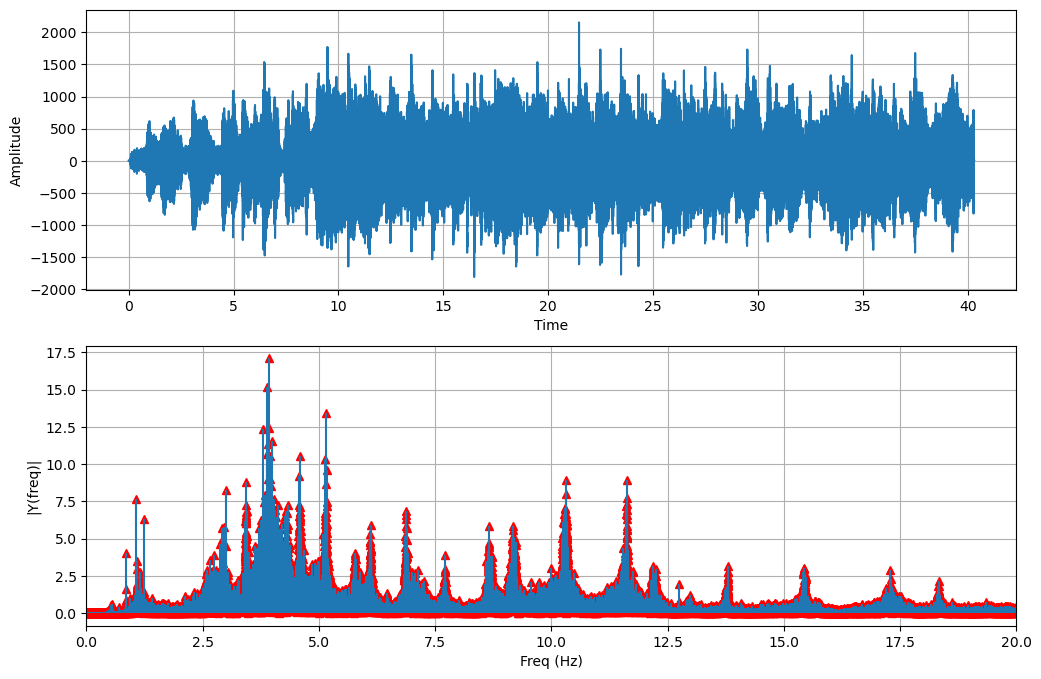

In [4]:
fig, ax = plt.subplots(2, 1, figsize=(12,8))
ax[0].plot(t, data)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude'); ax[0].grid(True)
ax[1].plot(freq, abs(Y), 'r', linestyle=' ', marker='^') 
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)|')
ax[1].vlines(freq, [0], abs(Y))
ax[1].set_xlim([0, 20]); ax[1].grid(True)
plt.show()

---

# STFT

In [5]:
def draw_stft(f, t, Zxx):
    plt.figure(figsize=(12,5))
    magnitude = 10 * np.log10(np.abs(Zxx))
    plt.pcolormesh(t, f, magnitude, vmin=0, vmax=np.max(magnitude),cmap='inferno', shading='gouraud')
    plt.title('STFT Magnitude'); plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]'); plt.ylim([0, 200]); plt.show()
    
def calc_stft(nperseg):
    f, t, Zxx = signal.stft(data, Fs, nperseg=nperseg)
    draw_stft(f, t, Zxx)

C:\Users\HYUN\AppData\Local\Temp\ipykernel_11024\1405374527.py:3: RuntimeWarning: divide by zero encountered in log10
  magnitude = 10 * np.log10(np.abs(Zxx))


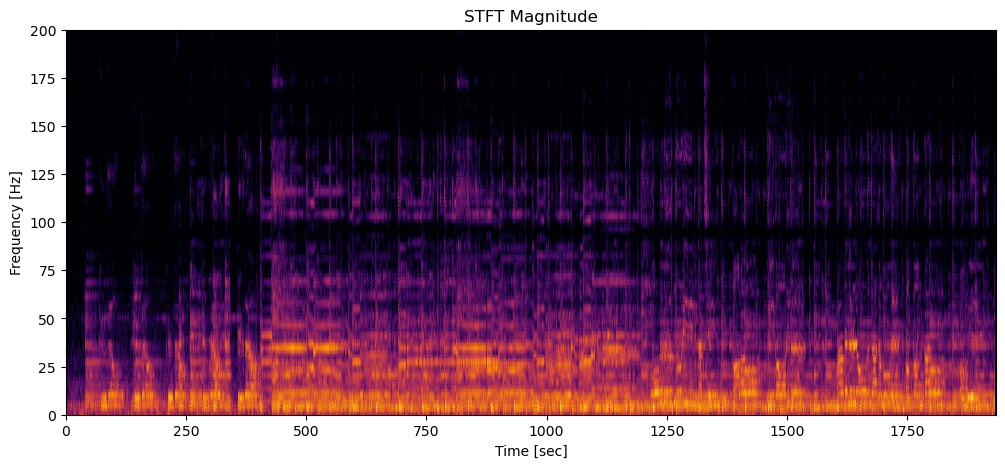

In [6]:
# window lenght : 500
# 진폭 값 낮은 부분 : 검은색, 높은 부분 : 노란색
calc_stft(500)

C:\Users\HYUN\AppData\Local\Temp\ipykernel_11024\1405374527.py:3: RuntimeWarning: divide by zero encountered in log10
  magnitude = 10 * np.log10(np.abs(Zxx))


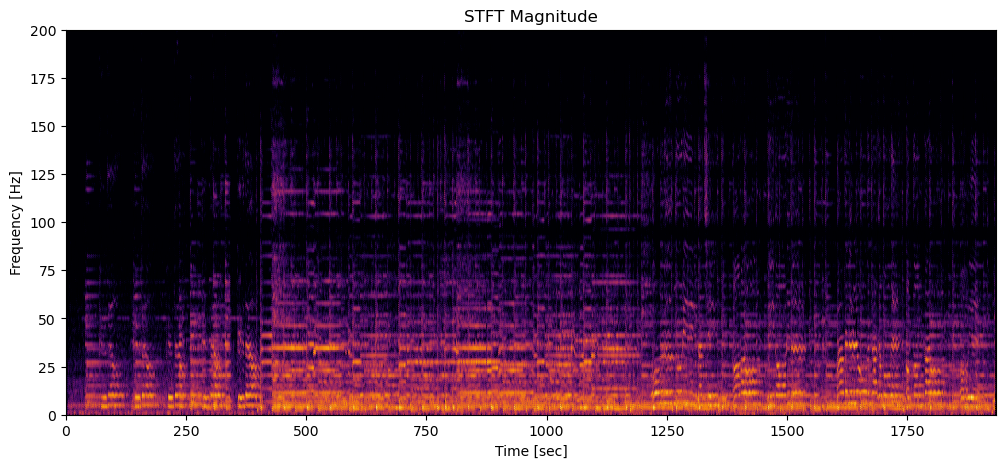

In [7]:
calc_stft(1000)

C:\Users\HYUN\AppData\Local\Temp\ipykernel_11024\1405374527.py:3: RuntimeWarning: divide by zero encountered in log10
  magnitude = 10 * np.log10(np.abs(Zxx))


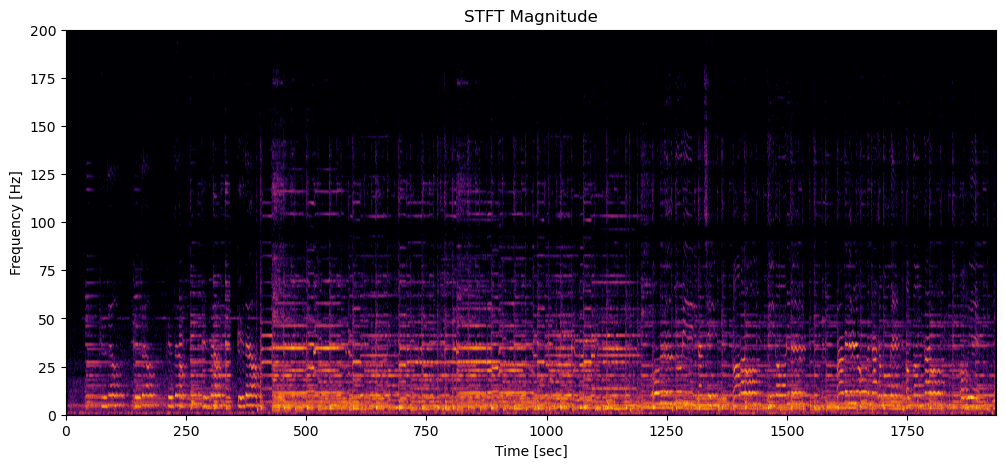

In [8]:
calc_stft(1500)